# **Exercises 16**
#Image Enhancement Techniques: Histogram Equalization and Gamma Method

# 1 - Does the original image need to enhance? (use original image histogram to prove your answer)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_origin=cv2.imread('/content/original.jpg',0)

In [16]:
def plt_hist(img,bins=256,range=(0,256)):
  plt.figure(figsize=(5,4),dpi=100)
  his_img=plt.hist(img.flat,bins=bins,range=range)
  plt.show(his_img)
  

In [4]:
def show_img_plt(img):
  plt.figure(figsize=(8,6),dpi=100)
  plt.imshow(img,cmap='gray')


In [13]:
def cv_hist(img,cannal=0,histsize=256,range=(0,256)):
  plt.figure(figsize=(5,4),dpi=100)
  hist_img=cv2.calcHist([img],[cannal],None,[histsize],range)
  plt.plot(hist_img)

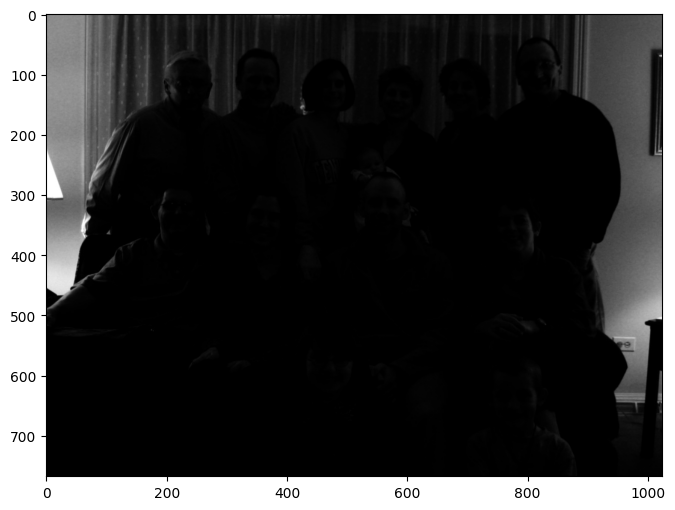

In [6]:
show_img_plt(img_origin)

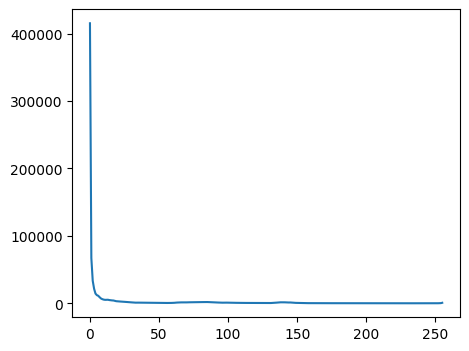

In [14]:
cv_hist(img_origin)

In [ ]:
plt_hist(img_origin)

# 2- enhance the original image to output image using contrast enhancement ways? 

In [18]:
#Histogram Equalization
eual_hist=cv2.equalizeHist(img_origin)

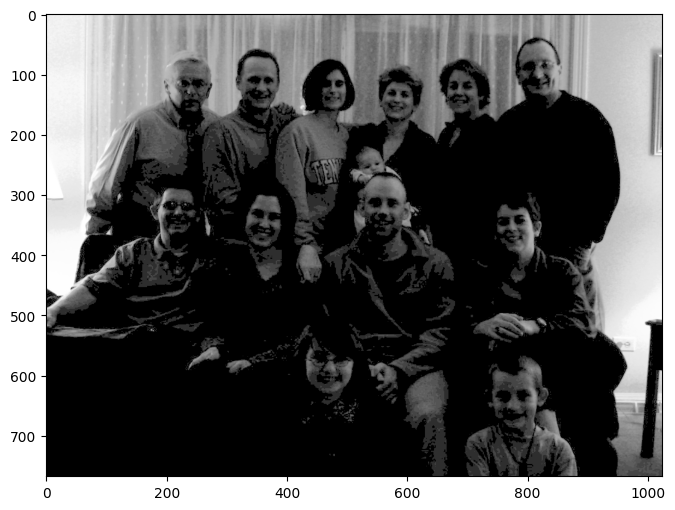

In [19]:
plt_img(eual_hist)

# 3- Plot the output image histogram

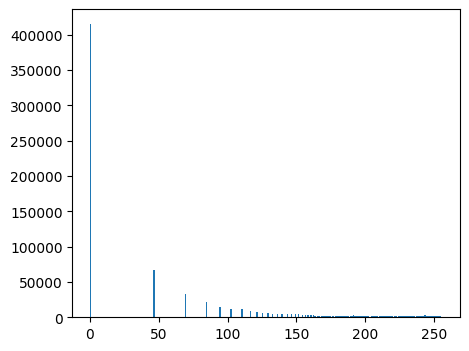

In [20]:
plt_hist(eual_hist)

In [ ]:
cv_his(eual_hist)

#Gamma Method

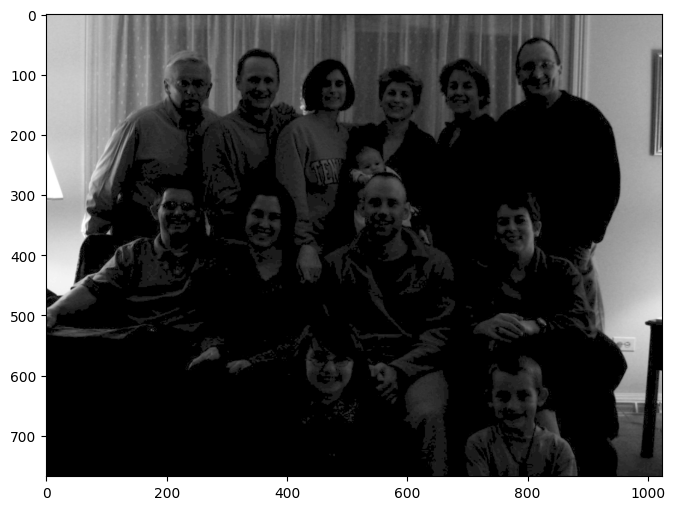

In [29]:
gamma=0.4
gamm_img=np.uint8(((img_origin/255)**gamma)*255)

show_img_plt(gamm_img)

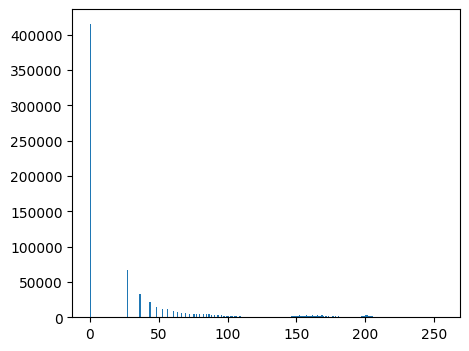

In [30]:
plt_hist(gamm_img)